# Variables BEGINNER

Esta tabla contiene la información de los expresiones Variables  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

TARGET_FEATURE = 'variable__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('variables')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-06-19 19:57:01.252372 Data cache files found ...
2024-06-19 19:57:01.759870 Data cache files successfully loaded!!
The dataset contains 1167967 (40.81%) instances for BEGINNER class and 1694338 (59.19%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'variables'
TABLE_FEATURES = ['variable__name_convention', 'variable__number_of_characters', 'variable__is_private', 'variable__is_magic']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

Features shape: (1167967, 4)
As we can see the downloaded data contains a total of 1167967 instances. Each of the instances corresponds to a program. For each program we have 4 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1167967 entries, 0 to 1169222
Data columns (total 4 columns):
 #   Column                          Non-Null Count    Dtype 
---  ------                          --------------    ----- 
 0   variable__name_convention       1167967 non-null  object
 1   variable__number_of_characters  1167967 non-null  int64 
 2   variable__is_private            1167967 non-null  bool  
 3   variable__is_magic              1167967 non-null  bool  
dtypes: bool(2), int64(1), object(1)
memory usage: 29.0+ MB
None


Cómo podemos ver la tabla está compuesta por 1 variable numérica, 2 variables boleanas y 2 de tipo objeto.

### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [99.97%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

variable__name_convention         0
variable__number_of_characters    0
variable__is_private              0
variable__is_magic                0
dtype: int64

In [6]:
print_empty_cols(X)

variable__name_convention
-------------------------
0 instancias no tienen un valor para la columna variable__name_convention


variable__number_of_characters
------------------------------
0 instancias no tienen un valor para la columna variable__number_of_characters


variable__is_private
--------------------
0 instancias no tienen un valor para la columna variable__is_private


variable__is_magic
------------------
0 instancias no tienen un valor para la columna variable__is_magic




### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
variable__name_convention,1167967,7,Lower,849874,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variable__number_of_characters,1167967.0,NaN,NaN,NaN,6.430985,4.465007,1.0,4.0,5.0,8.0,50.0
variable__is_private,1167967,2,False,1147182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variable__is_magic,1167967,2,False,1163025,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "variable__number_of_characters": [(0.0, 4.0), (4.0, 4.0), (4.0, 10.0), (10.0, inf)], # min: 0 ; max: 82
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['variable__number_of_characters'], 10))
print(get_statistics(full_table, ['variable__name_convention'], 10))
print(get_statistics(X_copy, ['variable__is_private'], 10))
print(get_statistics(X_copy, ['variable__is_magic'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(full_table, ['variable__is_magic', 'variable__name_convention_Discard'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
variable__number_of_characters  count  percentage
                    [4.0_10.0) 423892   36.293149
                     [0.0_4.0) 267688   22.919141
                     [4.0_4.0] 240349   20.578407
                    [10.0_inf] 236038   20.209304

variable__name_convention  count  percentage
                    Lower 849874   72.765241
                SnakeCase 169404   14.504177
                  CamelUp  71854    6.152057
                 CamelLow  42529    3.641284
                    Upper  25414    2.175918
         NoNameConvention   7929    0.678872
                  Discard    963    0.082451

 variable__is_private   count  percentage
                False 1147182   98.220412
                 True   20785    1.779588

 variable__is_magic   count  percentage
              False 1163025   99.576872
               True    4942    0.423128

--- TWO FEATURES ---
--- THREE FEATURES ---


In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (1167967, 10)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

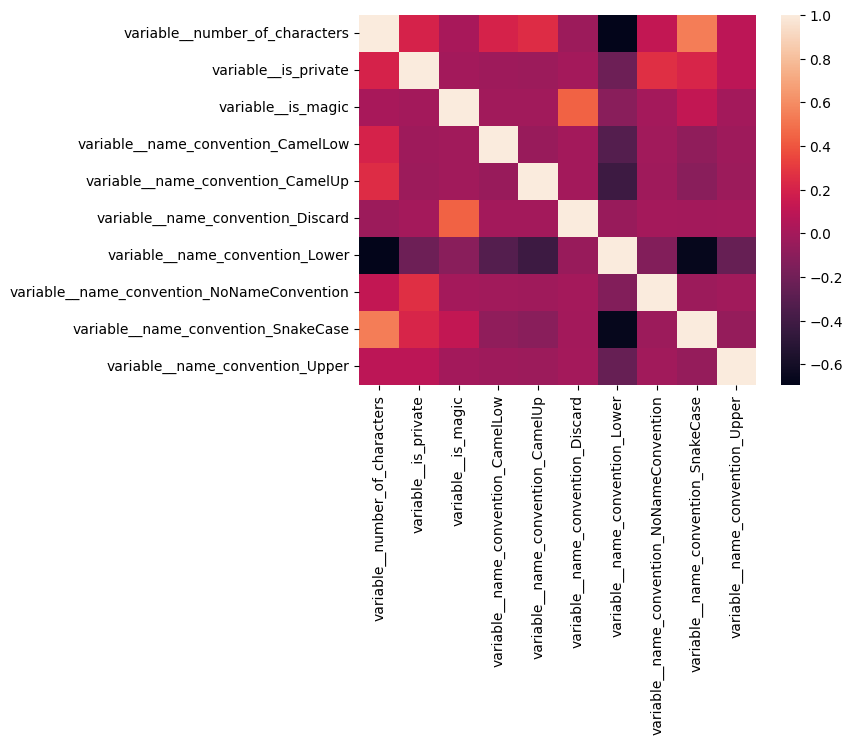

In [10]:
sns.heatmap(X.corr(), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 4 variables (1 numerica, 2 booleanas y 1 categorica) se hara un analisis detallado

### Variable is_private (1/4)
Esta variable es de tipo booleano y representa si la variable es privada.

<Axes: xlabel='variable__is_private', ylabel='Count'>

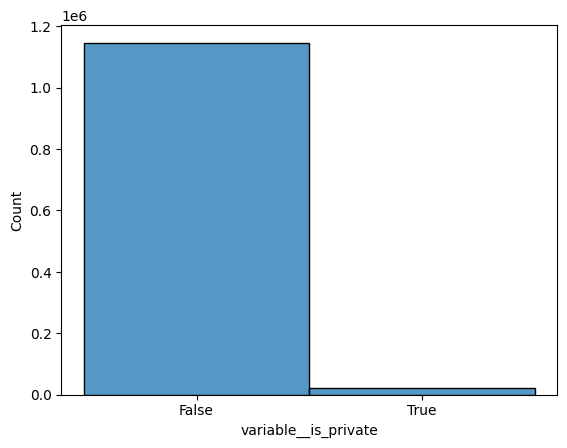

In [11]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['variable__is_private'], discrete=True)

In [12]:
num_true_values = len(X[X['variable__is_private'] == True])
num_false_values = len(X[X['variable__is_private'] == False])
std = X['variable__is_private'].std()
freq_true = len(X[X['variable__is_private'] == True]) / len(X['variable__is_private'])
freq_false = len(X[X['variable__is_private'] == False]) / len(X['variable__is_private'])
print(f'La variable is_private contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_private a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_private a False es {freq_false}.')

La variable is_private contiene 20785 valores verdaderos y 1147182 valores falsos. Y, la desviación típica es de 0.1322089284658432
La frecuencia con la que programa puede tener la variable is_private a True es 0.01779587950686963.
La frecuencia con la que programa puede tener la variable is_private a False es 0.9822041204931303.


In [13]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'variable__is_private', possible_values)

La variable variable__is_private contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable variable__is_private toma el valor de 0.0 en un 98.22% de los items.
La variable variable__is_private toma el valor de 1.0 en un 1.78% de los items.


In [14]:
X[X['variable__is_private'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,variable__number_of_characters,variable__is_private,variable__is_magic,variable__name_convention_CamelLow,variable__name_convention_CamelUp,variable__name_convention_Discard,variable__name_convention_Lower,variable__name_convention_NoNameConvention,variable__name_convention_SnakeCase,variable__name_convention_Upper
count,20785.000000,20785.0,20785.0,20785.0,20785.0,20785.0,20785.0,20785.000000,20785.000000,20785.000000
mean,13.260236,1.0,0.0,0.0,0.0,0.0,0.0,0.167669,0.713880,0.118451
std,6.220548,0.0,0.0,0.0,0.0,0.0,0.0,0.373581,0.451957,0.323149
min,2.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,9.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,13.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000
75%,17.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000
max,43.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


### Variable is_magic (2/4)
Esta variable es de tipo booleano y representa si la variable es magic.

<Axes: xlabel='variable__is_magic', ylabel='Count'>

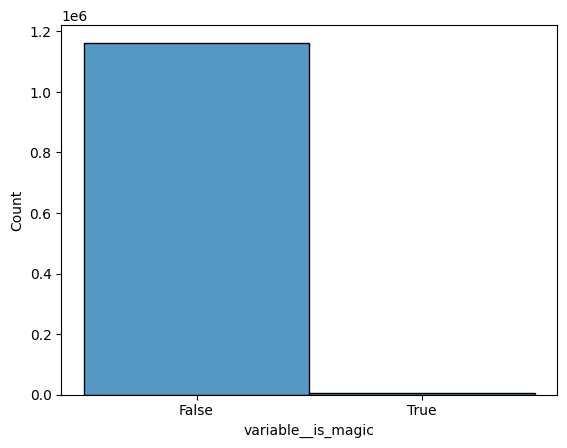

In [15]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['variable__is_magic'], discrete=True)

In [16]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['variable__is_magic'] == True])
num_false_values = len(X[X['variable__is_magic'] == False])
std = X['variable__is_magic'].std()
freq_true = len(X[X['variable__is_magic'] == True]) / len(X['variable__is_magic'])
freq_false = len(X[X['variable__is_magic'] == False]) / len(X['variable__is_magic'])
print(f'La variable is_magic contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_magic a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_magic a False es {freq_false}.')

La variable is_magic contiene 4942 valores verdaderos y 1163025 valores falsos. Y, la desviación típica es de 0.06491058319807053
La frecuencia con la que programa puede tener la variable is_magic a True es 0.004231283931823416.
La frecuencia con la que programa puede tener la variable is_magic a False es 0.9957687160681766.


In [17]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'variable__is_magic', possible_values)

La variable variable__is_magic contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable variable__is_magic toma el valor de 0.0 en un 99.58% de los items.
La variable variable__is_magic toma el valor de 1.0 en un 0.4231% de los items.


In [18]:
X[X['variable__is_magic'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,variable__number_of_characters,variable__is_private,variable__is_magic,variable__name_convention_CamelLow,variable__name_convention_CamelUp,variable__name_convention_Discard,variable__name_convention_Lower,variable__name_convention_NoNameConvention,variable__name_convention_SnakeCase,variable__name_convention_Upper
count,4942.000000,4942.0,4942.0,4942.0,4942.0,4942.000000,4942.0,4942.000000,4942.000000,4942.000000
mean,7.228248,0.0,1.0,0.0,0.0,0.194860,0.0,0.003642,0.794213,0.007285
std,3.412910,0.0,0.0,0.0,0.0,0.396133,0.0,0.060247,0.404317,0.085046
min,1.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,7.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000
50%,8.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000
75%,9.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000
max,22.000000,0.0,1.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000


### Variable number_of_characters (3/4)
Esta variable representa el número de caracteres del nombre de la variable. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 50. Con una media de 6.42.

<Axes: ylabel='variable__number_of_characters'>

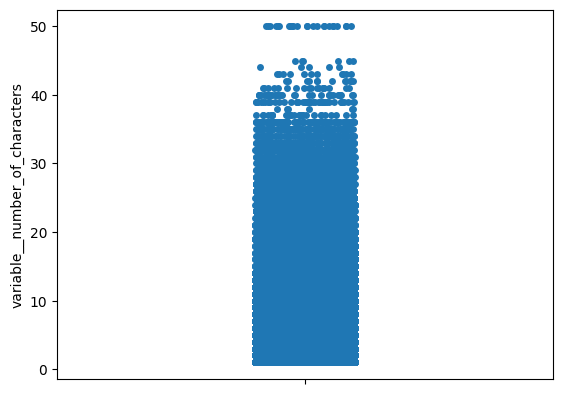

In [19]:
sns.stripplot(X['variable__number_of_characters'])

In [20]:
print_outliers_for_df_column(X, 'variable__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6652679637986787
Rango valores atípicos extremos (Tukey): [-8.0,20.0]
Rango valores atípicos leves (Tukey): [-2.0,14.0]
Rango valores atípicos extremos (Fixed BoxPlot): [3.4153128751082455,93.86972519397412]
-3.0IQR: 0 instancias tienen un valor para variable__number_of_characters inferior a -8.0 (Q1-3*IQR) para variable__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para variable__number_of_characters inferior a -2.0 (Q1-1.5*IQR) para variable__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 69230 instancias tienen un valor para variable__number_of_characters superior a 14.0 (Q3+1.5*IQR) para variable__number_of_characters. Representando un 5.927% del total de instancias.
+3.0IQR: 14120 instancias tienen un valor para variable__number_of_characters superior a 20.0 (Q3-3*IQR) para variable__number_of_characters. Representando un 1.209% d

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 20.0 (Con un MC de 66 usamos Tuckey Extremo)

In [21]:
X[X['variable__number_of_characters'] > 20].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,variable__number_of_characters,variable__is_private,variable__is_magic,variable__name_convention_CamelLow,variable__name_convention_CamelUp,variable__name_convention_Discard,variable__name_convention_Lower,variable__name_convention_NoNameConvention,variable__name_convention_SnakeCase,variable__name_convention_Upper
count,14120.000000,14120.000000,14120.000000,14120.000000,14120.000000,14120.0,14120.000000,14120.000000,14120.000000,14120.000000
mean,24.350142,0.185977,0.000425,0.068343,0.153470,0.0,0.001771,0.088739,0.571246,0.116431
std,3.899209,0.389102,0.020610,0.252342,0.360453,0.0,0.042042,0.284377,0.494915,0.320752
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,23.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,26.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,50.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Variable name_convention (4/4)
Esta variable es de tipo categorica y representa el name convention del nombre de la variable.

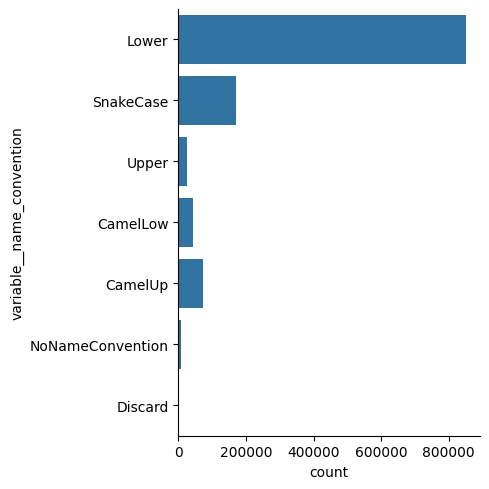

In [22]:
sns.catplot(full_table['variable__name_convention'], kind="count")

In [23]:
print_frequency_anal_for_cat_var(full_table, 'variable__name_convention')

La variable variable__name_convention contiene 7 valores distintos.
El umbral de outlier es de 0.028571428571428574%
La variable variable__name_convention toma el valor de Lower en un 72.77% de los items.
La variable variable__name_convention toma el valor de SnakeCase en un 14.5% de los items.
La variable variable__name_convention toma el valor de CamelUp en un 6.152% de los items.
La variable variable__name_convention toma el valor de CamelLow en un 3.641% de los items.
La variable variable__name_convention toma el valor de Upper en un 2.176% de los items.
La variable variable__name_convention toma el valor de NoNameConvention en un 0.6789% de los items.
La variable variable__name_convention toma el valor de Discard en un 0.08245% de los items.


In [24]:
print_values_usage_for_cat_var(full_table, 'variable__name_convention', NAMING_CONVENTION_VALUES)

La variable variable__name_convention puede tomar 7 valores distintos
	7 (100.0%) valores utilizados
	0 (0.0%) valores NO utilizados


## Multivariate

Isolation forest algorithm

In [25]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,variable__name_convention,variable__number_of_characters,variable__is_private,variable__is_magic,variable__expertise_level
3806,NoNameConvention,34,True,False,BEGINNER
3860,NoNameConvention,34,True,False,BEGINNER
6980,SnakeCase,35,True,False,BEGINNER
6981,SnakeCase,33,True,False,BEGINNER
6995,Upper,35,True,False,BEGINNER
...,...,...,...,...,...
1154783,NoNameConvention,23,True,False,BEGINNER
1156139,Upper,31,True,False,BEGINNER
1160879,Upper,21,True,False,BEGINNER
1160881,Upper,21,True,False,BEGINNER


### IMPORTANTE
Revisar los outliers detectados.

In [26]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
variable__number_of_characters,1329.0,25.066216,5.250945,20.0,21.0,23.0,27.0,43.0
variable__is_private,1329.0,0.995485,0.067065,0.0,1.0,1.0,1.0,1.0
variable__is_magic,1329.0,0.004515,0.067065,0.0,0.0,0.0,0.0,1.0
variable__name_convention_CamelLow,1329.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
variable__name_convention_CamelUp,1329.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
variable__name_convention_Discard,1329.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
variable__name_convention_Lower,1329.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
variable__name_convention_NoNameConvention,1329.0,0.623025,0.484811,0.0,0.0,1.0,1.0,1.0
variable__name_convention_SnakeCase,1329.0,0.145974,0.353213,0.0,0.0,0.0,0.0,1.0
variable__name_convention_Upper,1329.0,0.231001,0.421632,0.0,0.0,0.0,0.0,1.0


In [27]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
variable__number_of_characters,1166638.0,6.409756,4.419453,1.0,4.0,5.0,8.0,50.0
variable__is_private,1166638.0,0.016682,0.128077,0.0,0.0,0.0,0.0,1.0
variable__is_magic,1166638.0,0.004231,0.064908,0.0,0.0,0.0,0.0,1.0
variable__name_convention_CamelLow,1166638.0,0.036454,0.187418,0.0,0.0,0.0,0.0,1.0
variable__name_convention_CamelUp,1166638.0,0.061591,0.240411,0.0,0.0,0.0,0.0,1.0
variable__name_convention_Discard,1166638.0,0.000825,0.028719,0.0,0.0,0.0,0.0,1.0
variable__name_convention_Lower,1166638.0,0.728481,0.444743,0.0,0.0,1.0,1.0,1.0
variable__name_convention_NoNameConvention,1166638.0,0.006087,0.077780,0.0,0.0,0.0,0.0,1.0
variable__name_convention_SnakeCase,1166638.0,0.145041,0.352142,0.0,0.0,0.0,0.0,1.0
variable__name_convention_Upper,1166638.0,0.021521,0.145113,0.0,0.0,0.0,0.0,1.0
